In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys 
from tqdm import tqdm
sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata
import xgcm
print(xgcm.__path__)


['/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/xgcm']


In [5]:
path = '/media/drdarby/Elements/data/N_Greenland/solution_output/heat_budget/'
data_files, data_filepath = tools.get_data_paths_from_binary(path,'budget_pieces_2016/',file_end='nc')
#theta_eta_file, theta_eta_filepath = tools.get_data_paths_from_binary(path,'heat_budget/budget_pieces/',file_end='nc')

data = xr.open_mfdataset(data_filepath[:2])
theta_eta_snap = xr.open_mfdataset(data_filepath[-3])

grid_filepath = '/media/drdarby/Elements/data/L1_llc1080/L1_N_Greenland_grid.nc'
grid = xr.open_dataset(grid_filepath)#.rename({'XC':'longitude','YC':'latitude'})
#ds = xr.open_dataset(grid_filepath)
#grid_calc = xgcm.Grid(grid,periodic=False)

In [ ]:
grid_fram = xr.open_dataset(path + 'budget_pieces_2016/grid_fram.nc')

In [ ]:
grid

In [13]:
grid_fram

<xarray.Dataset>
Dimensions:  (Y: 49, X: 36, Z: 50)
Dimensions without coordinates: Y, X, Z
Data variables:
    XC       (Y, X) float32 ...
    YC       (Y, X) float32 ...
    XG       (Y, X) float32 ...
    YG       (Y, X) float32 ...
    AngleCS  (Y, X) float32 ...
    AngleSN  (Y, X) float32 ...
    HFacC    (Z, Y, X) float32 ...
    drF      (Z, Y, X) float32 ...
    Depth    (Y, X) float32 ...
    rA       (Y, X) float32 ...
    CellVol  (Y, X, Z) float32 ...

In [111]:
data_filepath

['/media/basil/Elements/data/N_Greenland/solution_output/heat_budget/budget_pieces_2016/fram_sub_heat_1.nc',
 '/media/basil/Elements/data/N_Greenland/solution_output/heat_budget/budget_pieces_2016/fram_sub_heat_2.nc',
 '/media/basil/Elements/data/N_Greenland/solution_output/heat_budget/budget_pieces_2016/fram_sub_snap.nc',
 '/media/basil/Elements/data/N_Greenland/solution_output/heat_budget/budget_pieces_2016/grid_fram.nc',
 '/media/basil/Elements/data/N_Greenland/solution_output/heat_budget/budget_pieces_2016/grid_fram_1.nc']

In [109]:
CellVol = RAC * drF * HFacC
grid['CellVol'] = CellVol

In [113]:
grid = grid.drop_vars(['dxC','dyC','dxG','dyG','HFacW','HFacS'])


In [102]:
#grid = grid.rename({'Z':'depths'})
#grid.coords['depths'] = data.depths
#grid = grid.set_coords(['XC','YC'])#.rename({'XC':'longitude','YC':'latitude'})
RAC = grid['rA']
drF = grid['drF']
HFacC = grid['HFacC']
#grid = grid.drop_vars(['dxC','dyC','dxG','dyG','HFacW','HFacS'])
#np.isfinite(HFacC)



<xarray.DataArray (Y: 720, X: 720, Z: 50)>
array([[[1.2876862e+08, 1.2876862e+08, 1.2876862e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.3296096e+08, 1.3296096e+08, 1.3296096e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.3451821e+08, 1.3451821e+08, 1.3451821e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [1.2208404e+08, 1.2208404e+08, 1.2208404e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.2210927e+08, 1.2210927e+08, 1.2210927e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.2213446e+08, 1.2213446e+08, 1.2213446e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.2883521e+08, 1.2883521e+08, 1.2883521e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.3302966e+08, 1.3302966e+08, 1.3302966e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.3458766e+08, 1.3458766e+08, 1.3458766e+08, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: Y, X, Z

In [115]:
#cut grid
transect_lon = np.array(lon_sampled)
transect_lat = np.array(lat_sampled)
lat_cut = grid.where(np.logical_and(transect_lat.max()+.5>grid.YC,transect_lat.min()-.5<grid.YC))
lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.XC,transect_lon.min()-.5<lat_cut.XC))
tran_cut = lon_cut.dropna(how='all',dim='X').dropna(how='all',dim='Y').dropna(how='all',dim='Z')
#tran_cut = tran_cut.where(np.isfinite(HFacC),0)

tran_cut.to_netcdf(path + 'budget_pieces_2016/grid_fram.nc')

In [117]:
grid = tran_cut 

In [118]:
grid = grid.rename({'Z':'depths'})
grid.coords['depths'] = data.depths
grid = grid.set_coords(['XC','YC']).rename({'XC':'longitude','YC':'latitude'})

In [7]:
# sec_itr_1080 = 300
# def date_to_iter_number(date,seconds_per_iter = 60):

#     total_seconds = (date-datetime(1992,1,1)).total_seconds()
#     iter_number = total_seconds/seconds_per_iter
#     # print(iter_number)
#     return(iter_number)

# def iter_number_to_date(iter_number,seconds_per_iter=60):

#     total_seconds = iter_number*seconds_per_iter
#     date = datetime(1992,1,1) + timedelta(seconds=total_seconds)
#     # print(date)
#     return(date)

In [8]:
# time_snap = []
# for i in range(0,12):
#     t_date = iter_number_to_date(np.array(theta_eta_snap.iterations)[i],seconds_per_iter=sec_itr_1080)
#     time_snap.append(t_date)
# time_snap
# theta_eta_snap.coords['iterations'] = np.array(time_snap)
# theta_eta_snap = theta_eta_snap.rename({'iterations':'time'})
# time_snap = []
# for i in range(0,12):
#     t_date = iter_number_to_date(np.array(data.iterations)[i],seconds_per_iter=sec_itr_1080)
#     time_snap.append(t_date)
# data.coords['iterations'] = np.array(time_snap)
# data = data.rename({'iterations':'time'})


In [1]:
grid

NameError: name 'grid' is not defined

In [9]:
# theta_eta_snap = theta_eta_snap.rename({'rows':'Y','cols':'X'})
# data = data.rename({'rows':'Y','cols':'X'})

In [10]:
# theta_eta_snap
# grid = grid.rename({'Z':'depths'})
# grid.coords['depths'] = data.depths
# grid = grid.set_coords(['XC','YC'])

In [11]:
# theta_eta_snap = theta_eta_snap.set_coords(['latitude','longitude'])
# data = data.set_coords(['latitude','longitude'])

In [12]:
to_hd = '/media/basil/Elements/data/'
data_files, data_filepath = tools.get_data_paths_from_binary(to_hd,'Fram',file_end='nc')
data_fram = xr.open_mfdataset(data_filepath[2])
data_test = data_fram.isel(TIME=0,STATION=0)
lat_sampled = data_test['LATITUDE']
lon_sampled = data_test['LONGITUDE']

In [99]:
grid['drF'].isel(Y=0,X=0) == grid['drF'].isel(Y=6,X=6)

<xarray.DataArray 'drF' (depths: 50)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])
Coordinates:
  * depths   (depths) float32 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03

In [13]:

# transect_lon = np.array(lon_sampled)
# transect_lat = np.array(lat_sampled)
# lat_cut = theta_eta_snap.where(np.logical_and(transect_lat.max()+.5>theta_eta_snap.latitude,transect_lat.min()-.5<theta_eta_snap.latitude))
# lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.longitude,transect_lon.min()-.5<lat_cut.longitude))
# tran_cut = lon_cut.dropna(how='all',dim='X').dropna(how='all',dim='Y')
# tran_cut.to_netcdf(path+'budget_pieces_2016/fram_sub_snap.nc')


In [14]:
# transect_lon = np.array(lon_sampled)
# transect_lat = np.array(lat_sampled)
# lat_cut = grid.where(np.logical_and(transect_lat.max()+.5>grid.YC,transect_lat.min()-.5<grid.YC))
# lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.XC,transect_lon.min()-.5<lat_cut.XC))
# tran_cut = lon_cut.dropna(how='all',dim='X').dropna(how='all',dim='Y')


In [15]:
#tran_cut.to_netcdf(path+'budget_pieces_2016/grid_fram_1.nc')


In [74]:
theta_eta_snap
#LHS (d(sTheta)/dt)
sTHETA = theta_eta_snap['Theta']*(1+theta_eta_snap['ETAN']/grid_fram.Depth)
sTHETA_dt = sTHETA.diff(dim='time')


In [48]:
theta_eta_snap['Theta']

<xarray.DataArray 'Theta' (time: 12, depths: 50, Y: 49, X: 36)>
dask.array<open_dataset-Theta, shape=(12, 50, 49, 36), dtype=float32, chunksize=(12, 50, 49, 36), chunktype=numpy.ndarray>
Coordinates:
    longitude  (Y, X) float32 dask.array<chunksize=(49, 36), meta=np.ndarray>
    latitude   (Y, X) float32 dask.array<chunksize=(49, 36), meta=np.ndarray>
  * depths     (depths) float32 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
  * time       (time) datetime64[ns] 2016-01-16 2016-02-16 ... 2016-12-16
Dimensions without coordinates: Y, X

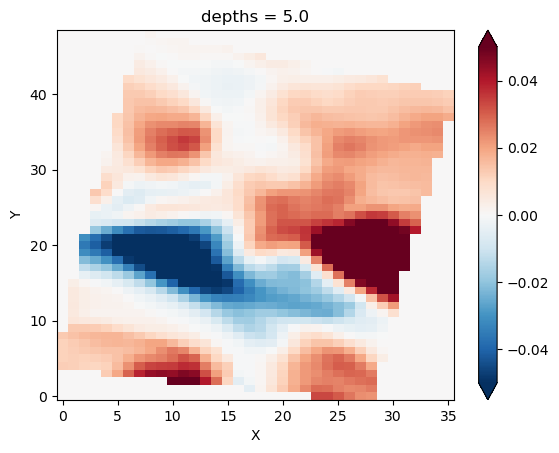

In [77]:
sTHETA_dt.isel(depths=0).sum(dim='time')

In [31]:
grid_fram = grid_fram.rename({'Z':'depths'})
CellVol = grid_fram['rA']* grid_fram['drF']* grid_fram['HFacC']
grid_fram['CellVol'] = CellVol


In [39]:
# Seawater density (kg/m^3)
rhoConst = 1029
## needed to convert surface mass fluxes to volume fluxes

# Heat capacity (J/kg/K)
c_p = 3994

# Constants for surface heat penetration (from Table 2 of Paulson and Simpson, 1977)
R = 0.62
zeta1 = 0.6
zeta2 = 20.0
depths = data.depths
depth = grid_fram['Depth']
#horizontal and vertical advection
ADVr_TH = data['ADVr_TH']
ADVx_TH = data['ADVx_TH']
ADVy_TH = data['ADVy_TH']

adv_hz_x = ADVx_TH.diff(dim='X')
adv_hz_y = ADVy_TH.diff(dim='Y')
adv_vt = ADVr_TH.diff(dim='depths',label='lower')

G_adv = (-1*adv_hz_x[:,:-1,:-1,:] - adv_hz_y[:,:-1,:,:-1] + adv_vt[:,:,:-1,:-1])/CellVol[:-1,:-1,:-1].where(CellVol[:-1,:-1,:-1]!=0)
#ADVxy_diff = grid_calc.diff_2d_vector({'X' : ADVx_TH, 'Y' : ADVy_TH}, boundary = 'fill')

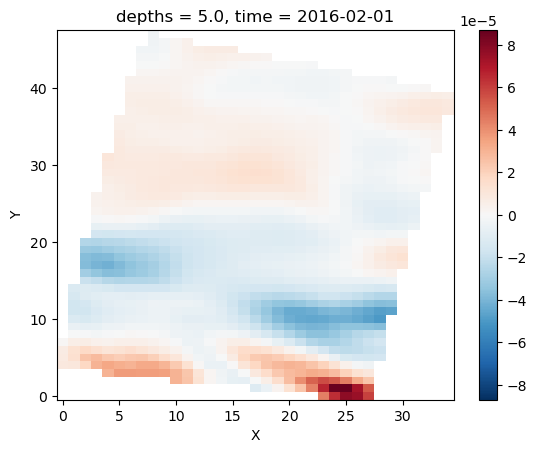

In [41]:
G_adv.isel(time=0,depths=0).plot()

In [19]:
G_adv

<xarray.DataArray (time: 12, depths: 49, Y: 48, X: 35)>
dask.array<truediv, shape=(12, 49, 48, 35), dtype=float32, chunksize=(12, 49, 48, 35), chunktype=numpy.ndarray>
Coordinates:
  * depths     (depths) float32 5.0 15.0 25.0 ... 4.64e+03 5.039e+03 5.461e+03
  * time       (time) datetime64[ns] 2016-02-01 2016-03-01 ... 2017-01-01
    longitude  (Y, X) float32 -0.9585 -0.981 -1.004 ... -9.435 -9.484 -9.534
    latitude   (Y, X) float32 78.44 78.47 78.51 78.54 ... 79.21 79.25 79.28
Dimensions without coordinates: Y, X

In [ ]:
#G_adv.to_netcdf(path+'budget_pieces_2016/G_adv.nc')


In [ ]:
#G_adv.close()

In [54]:
# diffusion
# Seawater density (kg/m^3)
rhoConst = 1029
## needed to convert surface mass fluxes to volume fluxes

# Heat capacity (J/kg/K)
c_p = 3994

# Constants for surface heat penetration (from Table 2 of Paulson and Simpson, 1977)
R = 0.62
zeta1 = 0.6
zeta2 = 20.0
depths = data.depths
#CellVol = RAC * drF * HFacC
depth = grid['Depth']
DFxE_TH = data['DFxE_TH']
DFyE_TH = data['DFyE_TH']
dif_hConvH = -1*(DFxE_TH.diff('X')[:,:,:-1,:] + DFyE_TH.diff('Y')[:,:,:,:-1])

DFrE_TH = data['DFrE_TH']
DFrI_TH = data['DFrI_TH']
dif_vConvH = DFrE_TH.diff('depths',label='lower')+DFrI_TH.diff('depths',label='lower')
Kpp_tend = data['KPPg_TH'].diff('depths',label='lower')
G_diff = (dif_hConvH[:,:-1,:,:] + dif_vConvH[:,:,:-1,:-1]+ Kpp_tend[:,:,:-1,:-1])/CellVol[:-1,:-1,:-1].where(CellVol[:-1,:-1,:-1]!=0)

#+ Kpp_tend[:,:,:-1,:-1])


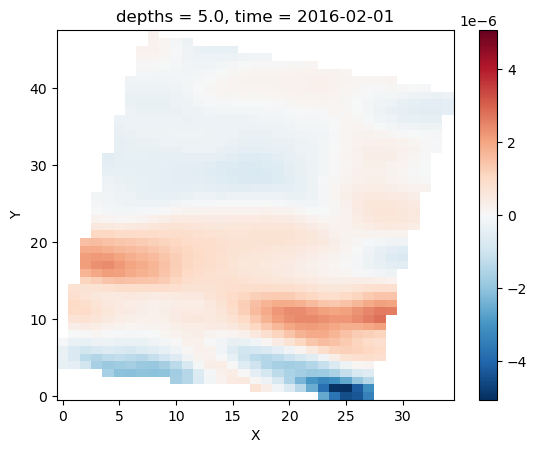

In [56]:
G_diff.isel(depths=0,time=0).plot()

In [78]:
#shortwave
TFLUX = data['TFLUX']
q1 = np.array(R*np.exp(1.0/zeta1*-1*depths[:-1]) + (1.0-R)*np.exp(1.0/zeta2*-1*depths[:-1]))
q2 = np.array(R*np.exp(1.0/zeta1*-1*depths[1:]) + (1.0-R)*np.exp(1.0/zeta2*-1*depths[1:]))
q1 = np.append(q1,0)
q2 = np.append(q2,0)
q1 = xr.DataArray(q1,coords=[data.depths],dims=['depths'])
q2 = xr.DataArray(q2,coords=[data.depths],dims=['depths'])
q1 = q1.where(depths<200,0) #correction for no heat pen past 200m
q2 = q2.where(depths<200,0)

oceQsw = data['oceQsw']
CellVol = grid_fram['rA']* grid_fram['drF']* grid_fram['HFacC']

# swfrac = 0.62 * np.exp(depth/0.6) + (1.0 - 0.62)*np.exp(depth/20.0)
# swfrac1 = 0.62 * np.exp(depth1/0.6) + (1.0 - 0.62)*np.exp(depth1/20.0)
Qsw_tend = oceQsw / (rhoConst * c_p) / (grid_fram['drF']* grid_fram['HFacC']) * (q1 -q2) 
Tflx_tend = (TFLUX - oceQsw) / (rhoConst * c_p * grid_fram['drF'][0] *grid_fram['HFacC'])
forcH_surf =(TFLUX - (1-(q1[0]-q2[0]))*oceQsw)
forcH_subsurf = (q1[1:]-q2[1:]*oceQsw)

forcH = xr.concat([forcH_surf,forcH_subsurf[:,:,:]], dim='depths')
G_forcing = ((forcH)/(rhoConst*c_p))/(grid_fram['HFacC']*grid_fram['drF']).where(CellVol!=0)

#G_forcing = G_forcing.where(CellVol==0,0)

# Dif_tend = - [ {DFrE_TH(ix,iy,iz) – DFrE_TH(ix,iy,iz+1)}/CellVol +
#  {DFrI_TH(ix,iy,iz) – DFrI_TH(ix,iy,iz+1)}/CellVol +
#  {DFxE_TH(ix+1,iy,iz) – DFxE_TH(ix,iy,iz)}/CellVol +
#  {DFyE_TH(ix,iy+1,iz) – DFyE_TH(ix,iy,iz)}/CellVol ] 
# Kpp_tend = - [ {KPPg-TH(ix,iy,iz) – KPPg_TH(ix,iy,iz+1)}/CellVol] 

# Adv_tend = - [ {ADVr_TH(ix,iy,iz) – ADVr_TH(ix,iy,iz+1)}/CellVol +
#  {ADVx_TH(ix+1,iy,iz) – ADVx_TH(ix,iy,iz)}/CellVol +
#  {ADVy_TH(ix,iy+1,iz) – ADVy_TH(ix,iy,iz)}/CellVol ] 

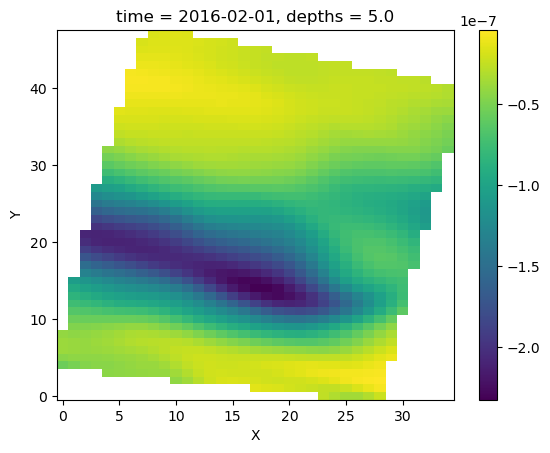

In [79]:
G_forcing[:,:-1,:-1,:-1].isel(time=0,depths=0).plot()

In [ ]:
G_diff.to_netcdf(path+'budget_pieces_2016/G_diff.nc')
G_adv.to_netcdf(path+'budget_pieces_2016/G_adv.nc')
G_forcing.to_netcdf(path+'budget_pieces_2016/G_forcing.nc')
sTHETA_dt.to_netcdf(path+'budget_pieces_2016/G_rhs.nc')

In [80]:
G_rhs = G_adv + G_diff+ G_forcing[:,:-1,:-1,:-1]
#G_rhs.to_netcdf('./heat_budget_rhs.nc')


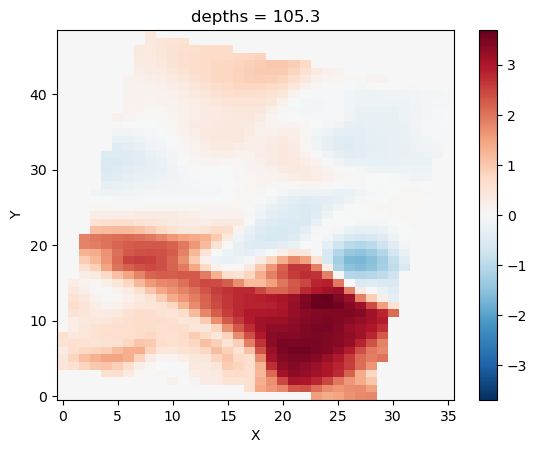

In [85]:
sTHETA_dt.isel(depths=10).sum(dim='time').plot()

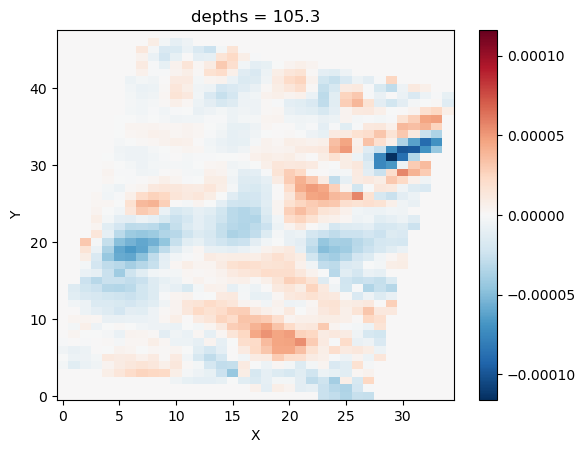

In [84]:
G_rhs.isel(depths=10).sum(dim='time').plot()

In [101]:
G_rhs.isel(time=slice(0,12))*weights

<xarray.DataArray (time: 11, depths: 48, Y: 48, X: 35)>
dask.array<mul, shape=(11, 48, 48, 35), dtype=timedelta64[ns], chunksize=(11, 48, 48, 35), chunktype=numpy.ndarray>
Coordinates:
  * depths     (depths) float32 15.0 25.0 35.0 ... 4.64e+03 5.039e+03 5.461e+03
  * time       (time) datetime64[ns] 2016-03-01 2016-04-01 ... 2017-01-01
    longitude  (Y, X) float32 dask.array<chunksize=(48, 35), meta=np.ndarray>
    latitude   (Y, X) float32 dask.array<chunksize=(48, 35), meta=np.ndarray>
    XC         (Y, X) float32 -0.9585 -0.981 -1.004 ... -9.435 -9.484 -9.534
    YC         (Y, X) float32 78.44 78.47 78.51 78.54 ... 79.21 79.25 79.28
Dimensions without coordinates: Y, X

In [134]:
G_tot.isel(time=slice(0,11))
G_rhs.isel(time=slice(0,12))*weights

<xarray.DataArray (time: 11, depths: 49, Y: 48, X: 35)>
dask.array<mul, shape=(11, 49, 48, 35), dtype=float64, chunksize=(11, 48, 48, 35), chunktype=numpy.ndarray>
Coordinates:
  * depths     (depths) float32 5.0 15.0 25.0 ... 4.64e+03 5.039e+03 5.461e+03
  * time       (time) datetime64[ns] 2016-03-01 2016-04-01 ... 2017-01-01
    longitude  (Y, X) float32 dask.array<chunksize=(48, 35), meta=np.ndarray>
    latitude   (Y, X) float32 dask.array<chunksize=(48, 35), meta=np.ndarray>
    XC         (Y, X) float32 -0.9585 -0.981 -1.004 ... -9.435 -9.484 -9.534
    YC         (Y, X) float32 78.44 78.47 78.51 78.54 ... 79.21 79.25 79.28
Dimensions without coordinates: Y, X

In [61]:
sTHETA_dt[:,:-1,:-1,:-1]
weights

<xarray.DataArray 'time' (time: 11)>
array([0.08656716, 0.09253731, 0.08955224, 0.09253731, 0.08955224,
       0.09253731, 0.09253731, 0.08955224, 0.09253731, 0.08955224,
       0.09253731])
Coordinates:
  * time     (time) datetime64[ns] 2016-02-01 2016-03-01 ... 2016-12-01

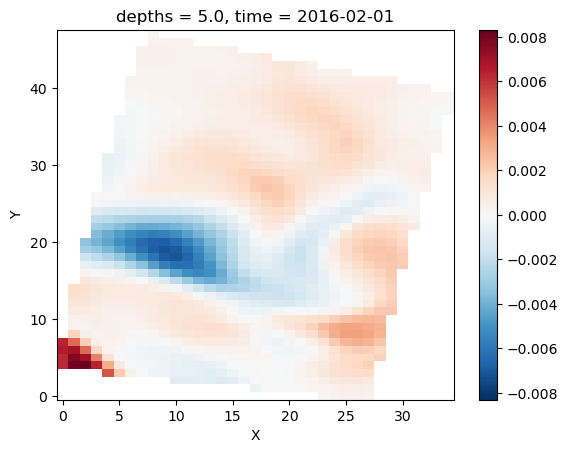

In [124]:
G_tot = sTHETA_dt[:,:-1,:-1,:-1]

G_tot.coords['time'] = G_rhs.time[:-1]
weights = G_tot.time.diff('time',label='lower')/G_tot.time.diff('time',label='lower').sum()
G_tot = G_tot*weights
(G_tot.isel(time=slice(0,11))-G_rhs.isel(time=slice(0,12))).isel(depths=0,time=0).plot()


In [81]:
G_sum = G_tot - G_rhs

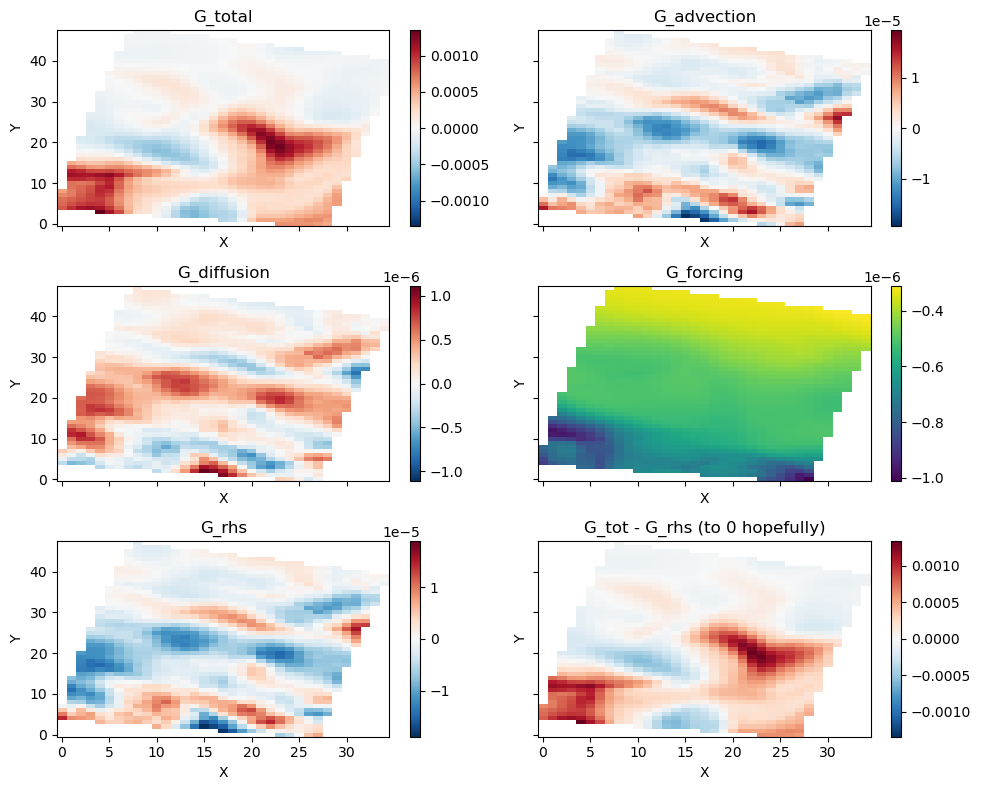

In [125]:
fig,ax = plt.subplots(ncols=2, nrows=3,figsize=(10,8),sharex=True,sharey=True,)
G_tot.isel(depths=0).mean(dim='time').plot(ax=ax[0,0])
ax[0,0].set_title('G_total')
G_adv.isel(depths=0).mean(dim='time').plot(ax=ax[0,1])
ax[0,1].set_title('G_advection')
G_diff.isel(depths=0).mean(dim='time').plot(ax=ax[1,0])
ax[1,0].set_title('G_diffusion')
G_forcing[:,:-1,:-1,:-1].isel(depths=0).mean(dim='time').plot(ax=ax[1,1])
ax[1,1].set_title('G_forcing')
G_rhs.isel(depths=0).mean(dim='time').plot(ax=ax[2,0])
ax[2,0].set_title('G_rhs')
G_sum.isel(depths=0).mean(dim='time').plot(ax=ax[2,1])
ax[2,1].set_title('G_tot - G_rhs (to 0 hopefully)')
plt.tight_layout()
plt.savefig('./heat_budget_terms.png')
# sTHETA_dt.isel(X=10,Y=10).plot(y='depths')
# plt.gca().invert_yaxis()
#G_rhs.isel(X=10,Y=10).plot()

In [ ]:
# G_adv.isel(X=10,Y=10).plot()

In [ ]:
# G_rhs.isel(X=100,Y=100,depths=10).plot()